# importing necessary files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# i have created simply a csv file from (spambase.data, .names) which is spambase_dataset.csv

In [3]:
data = pd.read_csv('spambase_dataset.csv')

# data has 4601 rows

In [4]:
data.shape

(4601, 58)

# theese are actually for understanding of every column, which has most bars? spam or nonspam, through it we can predict which word has impact. 

# example:
# word_freq_money this is column in our dataset by its histogram we can clearly see which emails spam or nonspam have mostly money word?

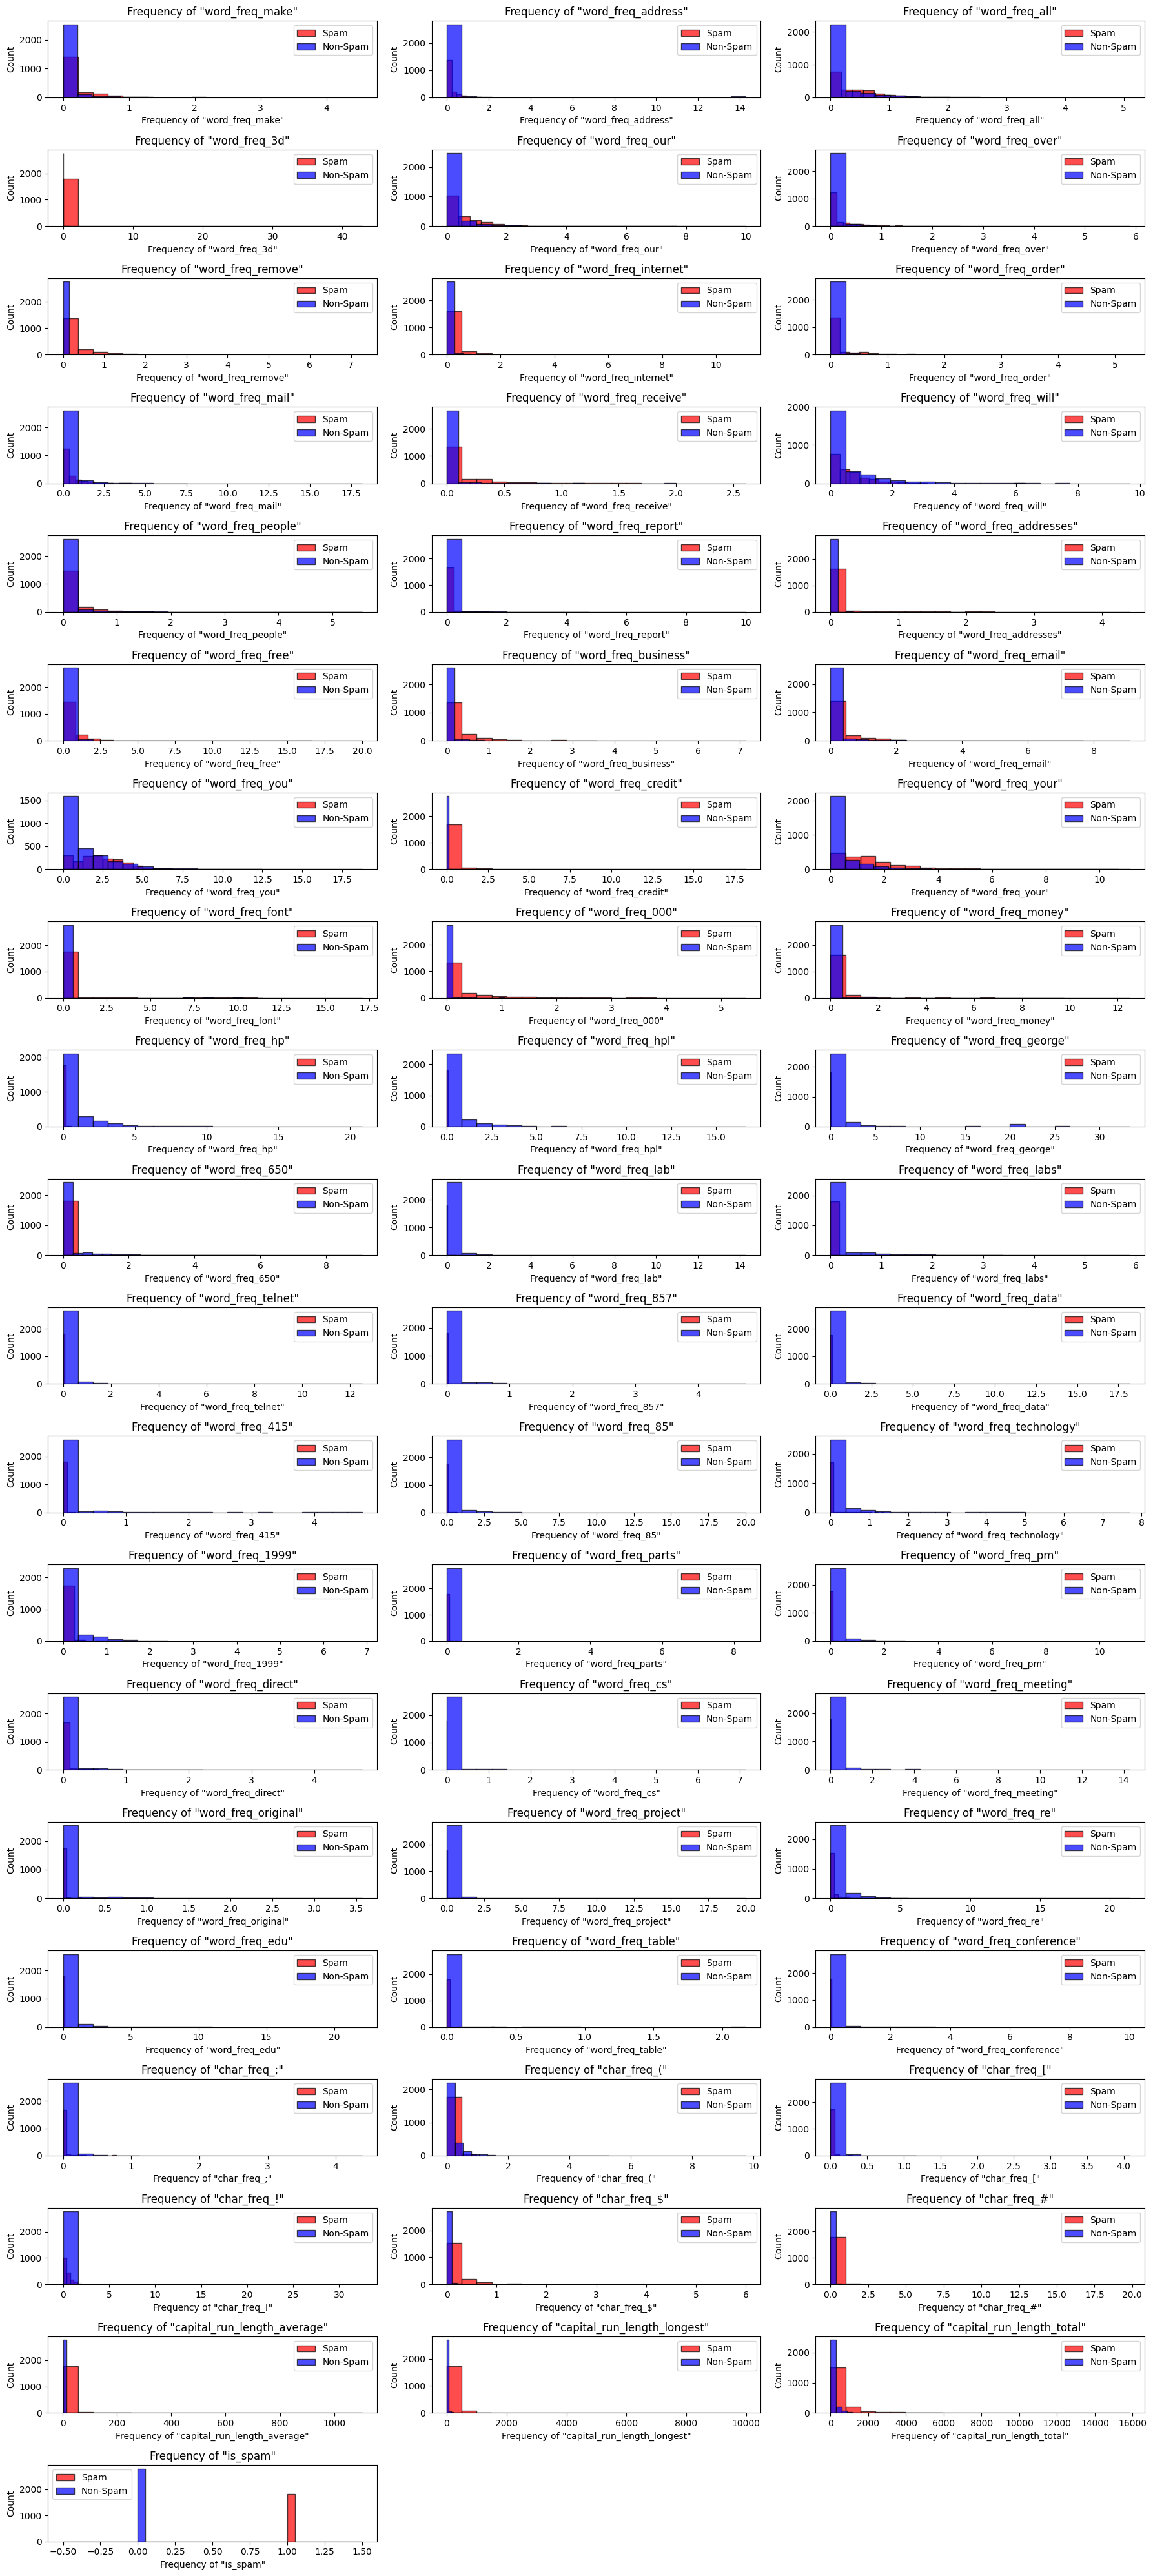

In [5]:
spam_emails = data[data['is_spam'] == 1]
non_spam_emails = data[data['is_spam'] == 0]
# List of columns related to word frequencies and character frequencies
columns_of_interest = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove',
    'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people',
    'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
    'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
    'char_freq_$', 'char_freq_#',
]
columns_of_interest = data.columns
# Plot histograms
plt.figure(figsize=(18, 40))  # Adjust the figure size as needed

# Loop through each column and create subplots
for i, column in enumerate(columns_of_interest, start=1):
    plt.subplot(len(columns_of_interest) // 3 + 1, 3, i)  # Adjust the subplot layout
    plt.hist(spam_emails[column], bins=20, color='red', alpha=0.7, label='Spam', edgecolor='black')
    plt.hist(non_spam_emails[column], bins=20, color='blue', alpha=0.7, label='Non-Spam', edgecolor='black')
    plt.title(f'Frequency of "{column}"')
    plt.xlabel(f'Frequency of "{column}"')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

# finding correlations with threshold 0.3

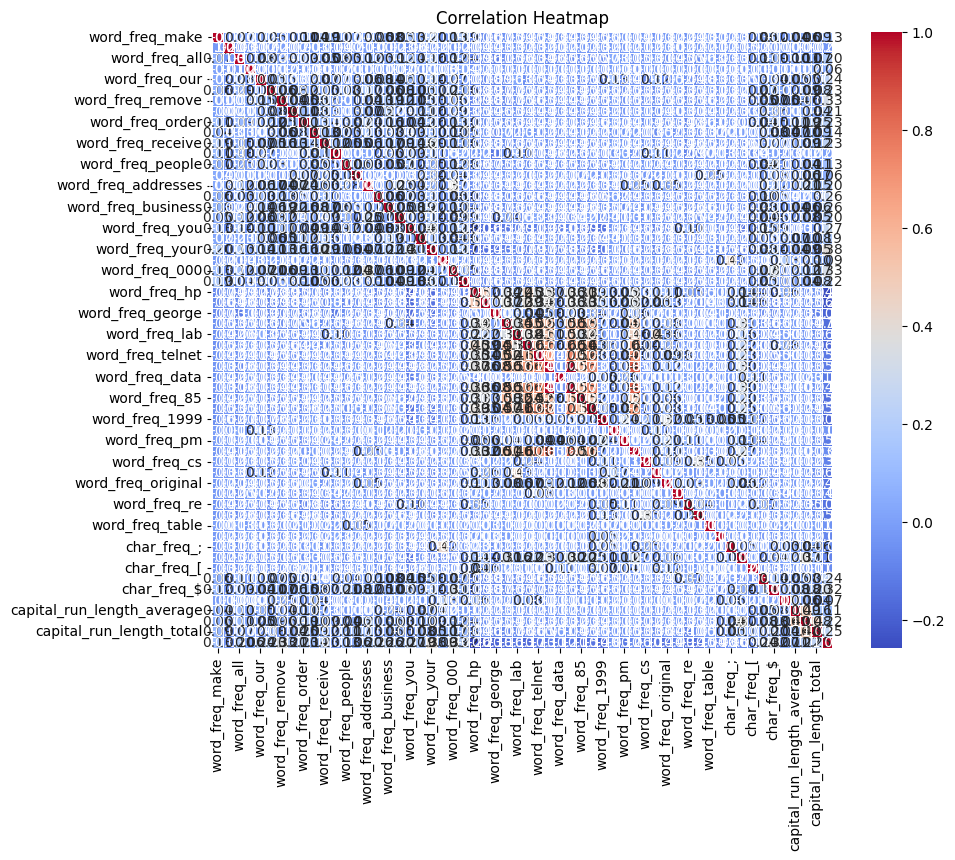

In [6]:
# Calculate correlations
correlations = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# created correlation csv file because terminal is skipping some rows while showing.

In [7]:
correlations.to_csv('c_m.csv')

In [8]:
correlation_df = pd.DataFrame(correlations)
corr_data = correlation_df['is_spam']
corr_data

word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl            

In [9]:
columns_to_delete = corr_data.index[abs(corr_data) >= 0.3].tolist()

print(f"Columns to delete: {columns_to_delete}")

Columns to delete: ['word_freq_remove', 'word_freq_your', 'word_freq_000', 'char_freq_$', 'is_spam']


# found column below threshold for deletion, and deleted

In [10]:
columns_to_delete = ['word_freq_remove', 'word_freq_your', 'word_freq_000', 'char_freq_$']

# Delete the specified columns
data_cleaned = data.drop(columns=columns_to_delete)

In [11]:
data_cleaned.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.07,0.00,0.94,0.21,...,0.0,0.00,0.132,0.0,0.372,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.12,0.64,0.25,0.38,...,0.0,0.01,0.143,0.0,0.276,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.63,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.63,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,3.537,40,191,1


In [12]:
# Assuming data_cleaned is your cleaned DataFrame
y = data_cleaned['is_spam']
x = data_cleaned.drop(columns=['is_spam'])

print("First few rows of the feature data (x):")
print(x.head())

print("\nFirst few rows of the target variable (y):")
print(y.tail())

First few rows of the feature data (x):
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_internet  word_freq_order  \
0           0.32            0.00                0.00             0.00   
1           0.14            0.28                0.07             0.00   
2           1.23            0.19                0.12             0.64   
3           0.63            0.00                0.63             0.31   
4           0.63            0.00                0.63             0.31   

   word_freq_mail  word_freq_receive  ...  word_freq_table  \
0            0.00               0.00  ...   

# spilitting dataset into train and test data , for test our data will be 20%

In [13]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3680, 53), (921, 53), (3680,), (921,))

# applying all theese classifiers

In [15]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

In [16]:
accuracies = {}
for clf_name, clf in classifiers.items():
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    accuracies[clf_name] = accuracy

C:\Users\shaik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
accuracies

{'Logistic Regression': 0.9120521172638436,
 'K-Nearest Neighbors': 0.7980456026058632,
 'Decision Tree': 0.8859934853420195,
 'Random Forest': 0.9489685124864278,
 'Gradient Boosting': 0.9337676438653637,
 'Support Vector Machine': 0.7024972855591748}

# getting highest accuracy from Random forest classifier 94.8%

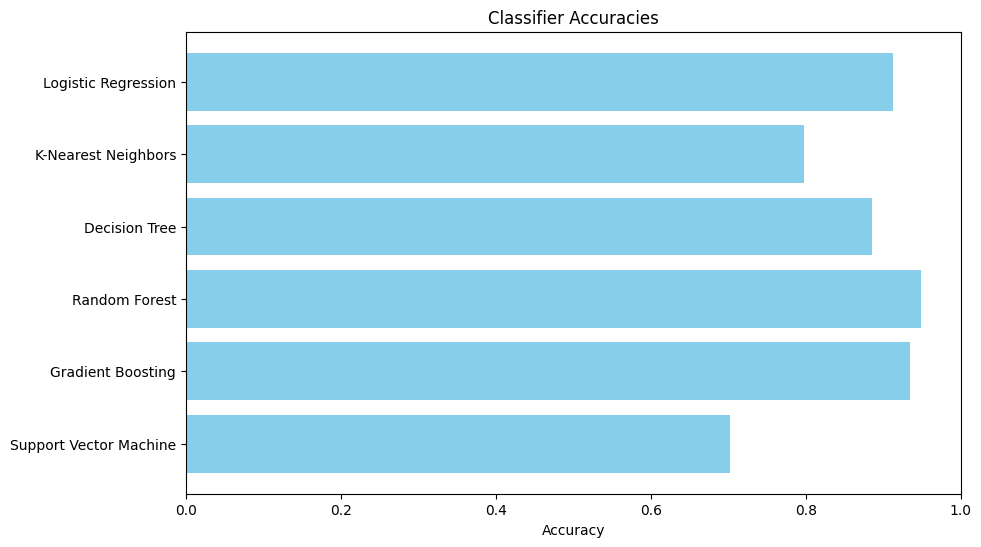

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracies')
plt.xlim(0.0, 1.0) 
plt.gca().invert_yaxis()
plt.show()